In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Understanding data (finding nulls , usefull data , etc)

In [2]:
match_df = pd.read_csv(r'D:\ipl data set\IPL Matches 2008-2020.csv')

In [3]:
match_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [5]:
match_df.isna().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [6]:
match_df['method'].fillna(value='No',inplace=True)

In [7]:
match_df['result'].fillna(value='NR',inplace=True)

In [8]:
match_df['winner'].fillna(value='Undecided',inplace=True)

In [9]:
match_df.isna().sum()

id                  0
city               13
date                0
player_of_match     4
venue               0
neutral_venue       0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              0
result              0
result_margin      17
eliminator          4
method              0
umpire1             0
umpire2             0
dtype: int64

In [10]:
type(match_df['date'][0])

str

In [11]:
year_of_match = match_df['date']
list_year = []
for x in year_of_match:
    list_year.append(x[:4])
    

match_df['year'] = list_year

In [12]:
match_df.shape

(816, 18)

### Drawing insights from data and plotting visualisations

#### Team and there points (2008)

In [13]:
def calc_points(match_df):
    if(match_df['result'] == 'tie'):
        return 1
    if(match_df['result'] == 'Undecided'):
        return 1
    else:
        return 2

In [14]:
match_df['points'] = match_df.apply(calc_points,axis = 1)

In [15]:
teams_of_2008 = match_df[match_df['year'] == '2008']

In [16]:
teams_of_2008['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings'],
      dtype=object)

As we can observe from the data that the results that in ipl 2008 , there were total 8 teams who participated in the tournament, and slowly as the ipl started becoming more famous and in the coming years more new teams were introduced

In [17]:
points_table = teams_of_2008.groupby(['winner']).sum().reset_index()[['winner','points']].rename(columns={'winner':'Teams','points':'Points'})
points_table.sort_values('Points',inplace=True,ascending = False)
points_table

,Teams,Points
6,Rajasthan Royals,26
3,Kings XI Punjab,20
0,Chennai Super Kings,18
2,Delhi Daredevils,14
5,Mumbai Indians,14
4,Kolkata Knight Riders,12
7,Royal Challengers Bangalore,8
1,Deccan Chargers,4


#### Total matches played by all teams

In [18]:
total_match = (teams_of_2008.groupby(['team1']).count() + teams_of_2008.groupby(['team2']).count())

In [19]:
total_match.drop(['team1','team2'],axis=1,inplace=True)

In [20]:
total_match.reset_index(inplace=True)
total_match[['team1','result']].rename(columns={'team1':'Teams','result':'Matches Played'})

,Teams,Matches Played
0,Chennai Super Kings,16
1,Deccan Chargers,14
2,Delhi Daredevils,14
3,Kings XI Punjab,15
4,Kolkata Knight Riders,13
5,Mumbai Indians,14
6,Rajasthan Royals,16
7,Royal Challengers Bangalore,14


### Most man of the match(2008)

<AxesSubplot:xlabel='player_of_match', ylabel='count'>

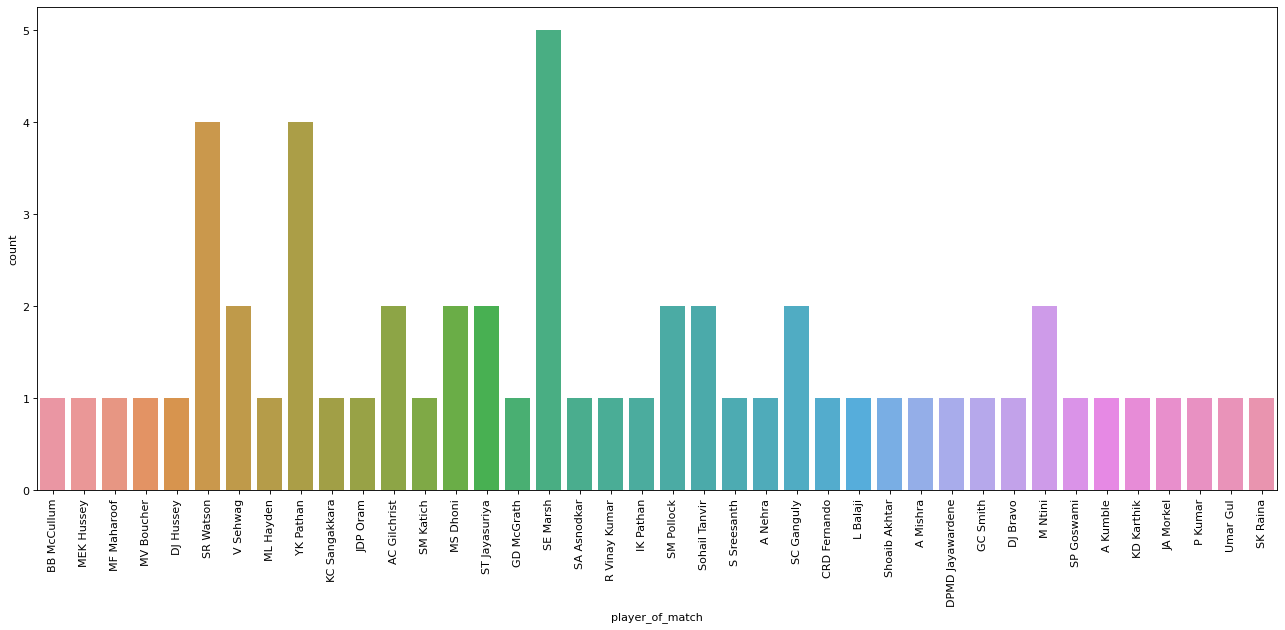

In [21]:
plt.figure(figsize=(20, 8), dpi=80)
plt.xticks(rotation = 90)
g = sns.countplot(x='player_of_match', data = teams_of_2008)
g

From the above graph we can see Shaun Marsh had a good season and he was awarded man of the match for 5 times , by this we can also make a good assumption that shawn marsh may have been one of the top contender for most run scorer.

### Toss affecting the match result (Team Wise)

Here we are checking for, does a team win a game if they win the toss 

In [22]:
toss_and_match_win = match_df[match_df['toss_winner'] == match_df['winner']]

In [23]:
win_percnt = (toss_and_match_win['id'].count()/match_df['id'].count())*100
print('{wp:.2f}%'.format(wp = win_percnt))

51.23%


From above calculation we can come to an conclusion that, there are more than 50% chance of winning a match if a team wins a toss , which definitely makes sense, because before the match starts, both the teams take a close look at the pitch conditions and also observing the previous match result, team already decides, if they win the toss whether they will ball first or bat first.  

In [24]:
kkr = match_df[match_df['toss_winner'] == 'Kolkata Knight Riders']

<AxesSubplot:xlabel='winner', ylabel='count'>

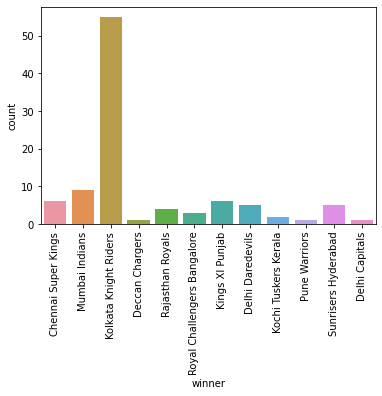

In [25]:
plt.xticks(rotation = 90)
sns.countplot(x='winner',data = kkr)

In [26]:
csk = match_df[match_df['toss_winner'] == 'Chennai Super Kings']

<AxesSubplot:xlabel='winner', ylabel='count'>

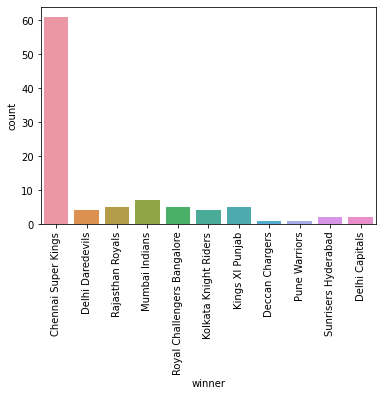

In [27]:
plt.xticks(rotation = 90)
sns.countplot(x='winner',data = csk)

In [28]:
rcb = match_df[match_df['toss_winner'] == 'Royal Challengers Bangalore']

<AxesSubplot:xlabel='winner', ylabel='count'>

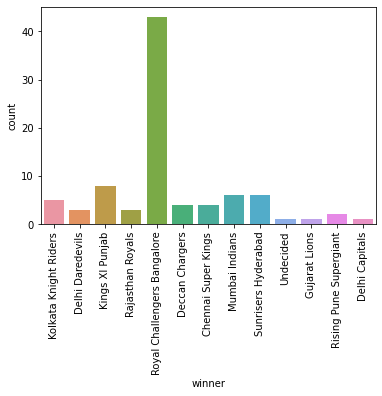

In [29]:
plt.xticks(rotation = 90)
sns.countplot(x='winner',data = rcb)

We previously obtained a result, that there are more than 50% chance for a team to win the match who will win the toss, and by plotting the above three graphs for teams Chennai Super King, Kolkata Knight Riders and Royal Challengers Bangalore , we can cleary prove our calculations

### Home Advantage for team (Teams playing at there home)

In [30]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [31]:
home_match_data1 = match_df[match_df['neutral_venue'] == 0]
home_match_data2 = home_match_data1[(home_match_data1['city'] != 'Dubai')]
home_match_data2 = home_match_data2[home_match_data2['city'] != 'Sharjah']
home_match_data2 = home_match_data2[home_match_data2['city'] != 'Abu Dhabi']
home_match_data2 = home_match_data2[home_match_data2['winner'] != 'Undecided']

In [32]:
def win(home_match_data2):
    if(home_match_data2['winner'] == 'Royal Challengers Bangalore'):
        return 'Bangalore'
    if(home_match_data2['winner'] == 'Kings XI Punjab'):
        return 'Punjab'
    if(home_match_data2['winner'] == 'Delhi Daredevils'):
        return 'Delhi'
    if(home_match_data2['winner'] == 'Delhi Capitals'):
        return 'Delhi'
    if(home_match_data2['winner'] == 'Mumbai Indians'):
        return 'Mumbai'
    if(home_match_data2['winner'] == 'Kolkata Knight Riders'):
        return 'Kolkata'
    if(home_match_data2['winner'] == 'Rajasthan Royals'):
        return 'Rajasthan'
    if(home_match_data2['winner'] == 'Deccan Chargers'):
        return 'Deccan'
    if(home_match_data2['winner'] == 'Chennai Super Kings'):
        return 'Chennai'
    if(home_match_data2['winner'] == 'Kochi Tuskers Kerala'):
        return 'Kerala'
    if(home_match_data2['winner'] == 'Pune Warriors'):
        return 'Pune'
    if(home_match_data2['winner'] == 'Sunrisers Hyderabad'):
        return 'Hyderabad'
    if(home_match_data2['winner'] == 'Gujarat Lions'):
        return 'Gujarat'
    if(home_match_data2['winner'] == 'Rising Pune Supergiants'):
        return 'Pune'
    if(home_match_data2['winner'] == 'Rising Pune Supergiant'):
        return 'Pune'

In [33]:
home_match_data2['win'] = home_match_data2.apply(win,axis = 1)

In [34]:
def assign_city(home_match_data2):
    if(home_match_data2['city'] == 'Cuttack'):
        if(home_match_data2['team1'] == 'Deccan Chargers' and ((home_match_data2['team2'] != 'Kings XI Punjab') 
           and (home_match_data2['team2'] != 'Kolkata Knight Riders'))):
            return 'Deccan'
        if(home_match_data2['team1'] == 'Kings XI Punjab' and ((home_match_data2['team2'] != 'Deccan Chargers') 
           and (home_match_data2['team2'] != 'Kolkata Knight Riders'))):
            return 'Punjab'
        if(home_match_data2['team1'] == 'Kolkata Knight Riders' and ((home_match_data2['team2'] != 'Deccan Chargers') 
           and (home_match_data2['team2'] != 'Kings XI Punjab'))):
            return 'Kolkata'
        if(home_match_data2['team2'] == 'Deccan Chargers' and ((home_match_data2['team1'] != 'Kings XI Punjab') 
           and (home_match_data2['team1'] != 'Kolkata Knight Riders'))):
            return 'Deccan'
        if(home_match_data2['team2'] == 'Kings XI Punjab' and ((home_match_data2['team1'] != 'Deccan Chargers') 
           and (home_match_data2['team1'] != 'Kolkata Knight Riders'))):
            return 'Punjab'
        if(home_match_data2['team2'] == 'Kolkata Knight Riders' and ((home_match_data2['team1'] != 'Deccan Chargers') 
           and (home_match_data2['team1'] != 'Kings XI Punjab'))):
            return 'Kolkata'
        if((home_match_data2['team1'] == 'Kolkata Knight Riders' or home_match_data2['team1'] == 'Deccan Chargers' or
           home_match_data2['team1'] == 'Kings XI Punjab') and (home_match_data2['team2'] == 'Kolkata Knight Riders' 
           or home_match_data2['team2'] == 'Deccan Chargers' or home_match_data2['team2'] == 'Kings XI Punjab')):
            return home_match_data2['win']
        
    if(home_match_data2['city'] == 'Hyderabad'):
        if(home_match_data2['team1'] == 'Deccan Chargers' and (home_match_data2['team2'] != 'Sunrisers Hyderabad')):
            return 'Deccan'
        if(home_match_data2['team1'] == 'Sunrisers Hyderabad' and (home_match_data2['team2'] != 'Deccan Chargers')):
            return 'Hyderabad'
        if(home_match_data2['team2'] == 'Deccan Chargers' and (home_match_data2['team1'] != 'Sunrisers Hyderabad')):
            return 'Deccan'
        if(home_match_data2['team2'] == 'Sunrisers Hyderabad' and (home_match_data2['team1'] != 'Deccan Chargers')):
            return 'Hyderabad'
        if((home_match_data2['team1'] == 'Sunrisers Hyderabad' or home_match_data2['team1'] == 'Deccan Chargers') 
           and (home_match_data2['team2'] == 'Deccan Chargers' or home_match_data2['team2'] == 'Sunrisers Hyderabad')):
            return home_match_data2['win']
        if((home_match_data2['team1'] != 'Sunrisers Hyderabad' or home_match_data2['team1'] != 'Deccan Chargers') 
           and (home_match_data2['team2'] != 'Deccan Chargers' or home_match_data2['team2'] != 'Sunrisers Hyderabad')):
            return 'Out Of Home'
        
    if(home_match_data2['city'] == 'Indore'):
        if(home_match_data2['team1'] == 'Kochi Tuskers Kerala' and (home_match_data2['team2'] != 'Kings XI Punjab')):
            return 'Kerala'
        if(home_match_data2['team1'] == 'Kings XI Punjab' and (home_match_data2['team2'] != 'Kochi Tuskers Kerala')):
            return 'Punjab'
        if(home_match_data2['team2'] == 'Kings XI Punjab' and (home_match_data2['team1'] != 'Kochi Tuskers Kerala')):
            return 'Punjab'
        if(home_match_data2['team2'] == 'Kochi Tuskers Kerala' and (home_match_data2['team1'] != 'Kings XI Punjab')):
            return 'Kerala'
        if((home_match_data2['team1'] == 'Kochi Tuskers Kerala' or home_match_data2['team1'] == 'Kings XI Punjab') 
           and (home_match_data2['team2'] == 'Kings XI Punjab' or home_match_data2['team2'] == 'Kochi Tuskers Kerala')):
            return home_match_data2['win']
        
    if(home_match_data2['city'] == 'Visakhapatnam'):
        if(home_match_data2['team1'] == 'Deccan Chargers' and ((home_match_data2['team2'] != 'Sunrisers Hyderabad') 
           and (home_match_data2['team2'] != 'Mumbai Indians') and (home_match_data2['team2'] != 'Rising Pune Supergiants')
           and (home_match_data2['team2'] != 'Rising Pune Supergiant'))):
            return 'Deccan'
        if(home_match_data2['team1'] == 'Sunrisers Hyderabad' and ((home_match_data2['team2'] != 'Deccan Chargers') 
           and (home_match_data2['team2'] != 'Mumbai Indians') and (home_match_data2['team2'] != 'Rising Pune Supergiants')
           and (home_match_data2['team2'] != 'Rising Pune Supergiant'))):
            return 'Hyderabad'
        if(home_match_data2['team1'] == 'Mumbai Indians' and ((home_match_data2['team2'] != 'Deccan Chargers') 
           and (home_match_data2['team2'] != 'Sunrisers Hyderabad') and (home_match_data2['team2'] != 'Rising Pune Supergiants')
           and (home_match_data2['team2'] != 'Rising Pune Supergiant'))):
            return 'Mumbai'
        if(home_match_data2['team1'] == 'Rising Pune Supergiants' and ((home_match_data2['team2'] != 'Deccan Chargers') 
           and (home_match_data2['team2'] != 'Sunrisers Hyderabad') and (home_match_data2['team2'] != 'Mumbai Indians')
           and (home_match_data2['team2'] != 'Rising Pune Supergiant'))):
            return 'Pune'
        if(home_match_data2['team1'] == 'Rising Pune Supergiant' and ((home_match_data2['team2'] != 'Deccan Chargers') 
           and (home_match_data2['team2'] != 'Sunrisers Hyderabad') and (home_match_data2['team2'] != 'Mumbai Indians')
           and (home_match_data2['team2'] != 'Rising Pune Supergiants'))):
            return 'Pune'
        if(home_match_data2['team2'] == 'Rising Pune Supergiant' and ((home_match_data2['team1'] != 'Deccan Chargers') 
           and (home_match_data2['team1'] != 'Sunrisers Hyderabad') and (home_match_data2['team1'] != 'Mumbai Indians')
           and (home_match_data2['team1'] != 'Rising Pune Supergiants'))):
            return 'Pune'  
        if(home_match_data2['team2'] == 'Rising Pune Supergiants' and ((home_match_data2['team1'] != 'Deccan Chargers') 
           and (home_match_data2['team1'] != 'Sunrisers Hyderabad') and (home_match_data2['team1'] != 'Mumbai Indians')
           and (home_match_data2['team1'] != 'Rising Pune Supergiant'))):
            return 'Pune'
        if(home_match_data2['team2'] == 'Mumbai Indians' and ((home_match_data2['team1'] != 'Deccan Chargers') 
           and (home_match_data2['team1'] != 'Sunrisers Hyderabad') and (home_match_data2['team1'] != 'Rising Pune Supergiants')
           and (home_match_data2['team1'] != 'Rising Pune Supergiant'))):
            return 'Mumbai'
        if(home_match_data2['team2'] == 'Sunrisers Hyderabad' and ((home_match_data2['team1'] != 'Deccan Chargers') 
           and (home_match_data2['team1'] != 'Mumbai Indians') and (home_match_data2['team1'] != 'Rising Pune Supergiants')
           and (home_match_data2['team1'] != 'Rising Pune Supergiant'))):
            return 'Hyderabad'
        if(home_match_data2['team2'] == 'Deccan Chargers' and ((home_match_data2['team1'] != 'Sunrisers Hyderabad') 
           and (home_match_data2['team1'] != 'Mumbai Indians') and (home_match_data2['team1'] != 'Rising Pune Supergiants')
           and (home_match_data2['team1'] != 'Rising Pune Supergiant'))):
            return 'Deccan'   
        if((home_match_data2['team1'] == 'Sunrisers Hyderabad' or home_match_data2['team1'] == 'Deccan Chargers' or
           home_match_data2['team1'] == 'Mumbai Indians' or home_match_data2['team1'] == 'Rising Pune Supergiants'
           or home_match_data2['team1'] == 'Rising Pune Supergiant') and (home_match_data2['team2'] == 'Sunrisers Hyderabad' 
           or home_match_data2['team2'] == 'Deccan Chargers' or home_match_data2['team2'] == 'Mumbai Indians' or 
           home_match_data2['team2'] == 'Rising Pune Supergiants' or home_match_data2['team2'] == 'Rising Pune Supergiant')):
            return home_match_data2['win']
        if((home_match_data2['team1'] != 'Sunrisers Hyderabad' or home_match_data2['team1'] != 'Deccan Chargers' or
           home_match_data2['team1'] != 'Mumbai Indians' or home_match_data2['team1'] != 'Rising Pune Supergiants'
           or home_match_data2['team1'] != 'Rising Pune Supergiant') and (home_match_data2['team2'] != 'Sunrisers Hyderabad' 
           or home_match_data2['team2'] != 'Deccan Chargers' or home_match_data2['team2'] != 'Mumbai Indians' or 
           home_match_data2['team2'] != 'Rising Pune Supergiants' or home_match_data2['team2'] != 'Rising Pune Supergiant')):
            return 'Out Of Home'
        
    if(home_match_data2['city'] == 'Pune'):
        if(home_match_data2['team1'] == 'Pune Warriors' and ((home_match_data2['team2'] != 'Kings XI Punjab') 
           and (home_match_data2['team2'] != 'Chennai Super Kings') and (home_match_data2['team2'] != 'Rising Pune Supergiants')
           and (home_match_data2['team2'] != 'Rising Pune Supergiant'))):
            return 'Pune'
        if(home_match_data2['team1'] == 'Kings XI Punjab' and ((home_match_data2['team2'] != 'Pune Warriors') 
           and (home_match_data2['team2'] != 'Chennai Super Kings') and (home_match_data2['team2'] != 'Rising Pune Supergiants')
           and (home_match_data2['team2'] != 'Rising Pune Supergiant'))):
            return 'Hyderabad'
        if(home_match_data2['team1'] == 'Chennai Super Kings' and ((home_match_data2['team2'] != 'Kings XI Punjab') 
           and (home_match_data2['team2'] != 'Pune Warriors') and (home_match_data2['team2'] != 'Rising Pune Supergiants')
           and (home_match_data2['team2'] != 'Rising Pune Supergiant'))):
            return 'Mumbai'
        if(home_match_data2['team1'] == 'Rising Pune Supergiants' and ((home_match_data2['team2'] != 'Chennai Super Kings') 
           and (home_match_data2['team2'] != 'Kings XI Punjab') and (home_match_data2['team2'] != 'Pune Warriors')
           and (home_match_data2['team2'] != 'Rising Pune Supergiant'))):
            return 'Pune'
        if(home_match_data2['team1'] == 'Rising Pune Supergiant' and ((home_match_data2['team2'] != 'Chennai Super Kings') 
           and (home_match_data2['team2'] != 'Kings XI Punjab') and (home_match_data2['team2'] != 'Pune Warriors')
           and (home_match_data2['team2'] != 'Rising Pune Supergiants'))):
            return 'Pune'
        if(home_match_data2['team2'] == 'Rising Pune Supergiant' and ((home_match_data2['team1'] != 'Chennai Super Kings') 
           and (home_match_data2['team1'] != 'Kings XI Punjab') and (home_match_data2['team1'] != 'Pune Warriors')
           and (home_match_data2['team1'] != 'Rising Pune Supergiants'))):
            return 'Pune'  
        if(home_match_data2['team2'] == 'Rising Pune Supergiants' and ((home_match_data2['team1'] != 'Chennai Super Kings') 
           and (home_match_data2['team1'] != 'Kings XI Punjab') and (home_match_data2['team1'] != 'Pune Warriors')
           and (home_match_data2['team1'] != 'Rising Pune Supergiant'))):
            return 'Pune'
        if(home_match_data2['team2'] == 'Chennai Super Kings' and ((home_match_data2['team1'] != 'Rising Pune Supergiants') 
           and (home_match_data2['team1'] != 'Kings XI Punjab') and (home_match_data2['team1'] != 'Pune Warriors')
           and (home_match_data2['team1'] != 'Rising Pune Supergiant'))):
            return 'Chennai'
        if(home_match_data2['team2'] == 'Kings XI Punjab' and ((home_match_data2['team1'] != 'Chennai Super Kings') 
           and (home_match_data2['team1'] != 'Pune Warriors') and (home_match_data2['team1'] != 'Rising Pune Supergiants')
           and (home_match_data2['team1'] != 'Rising Pune Supergiant'))):
            return 'Punjab'
        if(home_match_data2['team2'] == 'Pune Warriors' and ((home_match_data2['team1'] != 'Kings XI Punjab') 
           and (home_match_data2['team1'] != 'Chennai Super Kings') and (home_match_data2['team1'] != 'Rising Pune Supergiants')
           and (home_match_data2['team1'] != 'Rising Pune Supergiant'))):
            return 'Pune'   
        if((home_match_data2['team1'] == 'Pune Warriors' or home_match_data2['team1'] == 'Kings XI Punjab' or
           home_match_data2['team1'] == 'Chennai Super Kings' or home_match_data2['team1'] == 'Rising Pune Supergiants'
           or home_match_data2['team1'] == 'Rising Pune Supergiant') and (home_match_data2['team2'] == 'Pune Warriors' 
           or home_match_data2['team2'] == 'Kings XI Punjab' or home_match_data2['team2'] == 'Chennai Super Kings' or 
           home_match_data2['team2'] == 'Rising Pune Supergiants' or home_match_data2['team2'] == 'Rising Pune Supergiant')):
            return home_match_data2['win']
        if((home_match_data2['team1'] != 'Pune Warriors' or home_match_data2['team1'] != 'Kings XI Punjab' or
           home_match_data2['team1'] != 'Chennai Super Kings' or home_match_data2['team1'] != 'Rising Pune Supergiants'
           or home_match_data2['team1'] != 'Rising Pune Supergiant') and (home_match_data2['team2'] != 'Pune Warriors' 
           or home_match_data2['team2'] != 'Kings XI Punjab' or home_match_data2['team2'] != 'Chennai Super Kings' or 
           home_match_data2['team2'] != 'Rising Pune Supergiants' or home_match_data2['team2'] != 'Rising Pune Supergiant')):
            return 'Out Of Home'
           
    if(home_match_data2['city'] == 'Ranchi'):
        if(home_match_data2['team1'] == 'Chennai Super Kings' and (home_match_data2['team2'] != 'Kolkata Knight Riders')):
            return 'Chennai'
        if(home_match_data2['team1'] == 'Kolkata Knight Riders' and (home_match_data2['team2'] != 'Chennai Super Kings')):
            return 'Kolkata'
        if(home_match_data2['team2'] == 'Chennai Super Kings' and (home_match_data2['team1'] != 'Kolkata Knight Riders')):
            return 'Chennai'
        if(home_match_data2['team2'] == 'Kolkata Knight Riders' and (home_match_data2['team1'] != 'Chennai Super Kings')):
            return 'Kolkata'
        if((home_match_data2['team1'] == 'Chennai Super Kings' or home_match_data2['team1'] == 'Kolkata Knight Riders') 
           and (home_match_data2['team2'] == 'Kolkata Knight Riders' or home_match_data2['team2'] == 'Chennai Super Kings')):
            return home_match_data2['win']       
               
    if(home_match_data2['city'] == 'Chandigarh'or home_match_data2['city'] =='Dharamsala'):
        return 'Punjab'
    if(home_match_data2['city'] =='Delhi' or home_match_data2['city'] =='Raipur'):
        return 'Delhi'
    if(home_match_data2['city'] =='Bangalore' or home_match_data2['city'] =='Bengaluru'):
        return 'Bangalore'
    if(home_match_data2['city'] == 'Kolkata'):
        return 'Kolkata'
    if(home_match_data2['city'] == 'Chennai'):
        return 'Chennai'
    if(home_match_data2['city'] == 'Mumbai'):
        return 'Mumbai'
    if(home_match_data2['city'] == 'Ahmedabad' or home_match_data2['city'] == 'Jaipur'):
        return 'Rajasthan'
    if(home_match_data2['city'] == 'Kochi'):
        return 'Kochi'
    if(home_match_data2['city'] == 'Nagpur'):
        return 'Deccan'
    if(home_match_data2['city'] == 'Kanpur' or home_match_data2['city'] == 'Rajkot'):
        return 'Gujarat'

In [35]:
home_match_data2['city_copy'] = home_match_data2.apply(assign_city,axis=1)

In [36]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [37]:
kkr = home_match_data2[home_match_data2['city_copy'] == 'Kolkata']

<AxesSubplot:xlabel='Teams', ylabel='Total Wins'>

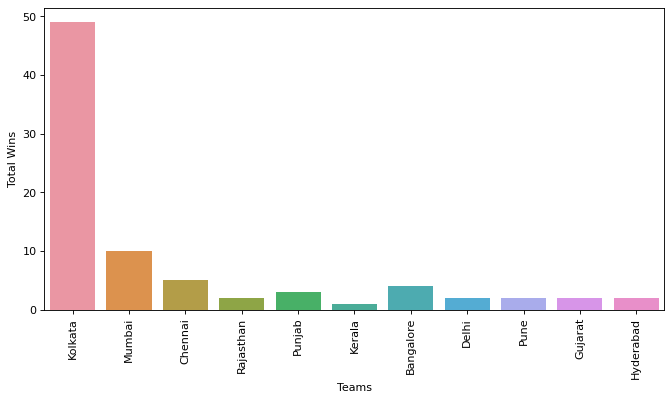

In [38]:
plt.figure(figsize=(10, 5), dpi=80)
plt.xticks(rotation = 90)
g = sns.countplot(x='win',data=kkr)
plt.xlabel('Teams')
plt.ylabel('Total Wins')
g.yaxis.set_major_locator(plt.MultipleLocator(10))
g

In [39]:
pjb = kkr = home_match_data2[home_match_data2['city_copy'] == 'Punjab']

<AxesSubplot:xlabel='Teams', ylabel='Total Wins'>

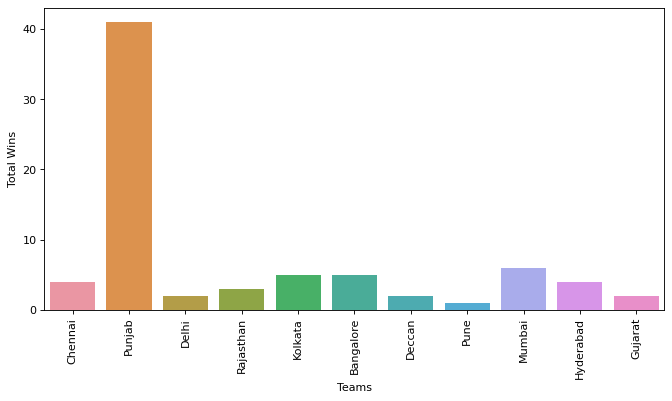

In [40]:
plt.figure(figsize=(10, 5), dpi=80)
plt.xticks(rotation = 90)
g = sns.countplot(x='win',data=pjb)
plt.xlabel('Teams')
plt.ylabel('Total Wins')
g.yaxis.set_major_locator(plt.MultipleLocator(10))
g

It can be clearly observed from the above two graphs, that teams playing at there home has clear advantage as there win ratio increases a lot and it clearly makes sense as the team know well about there ground and pitch conditions and this leads to team winning more matches at there home.

### Toss favouring team percentage

#### We are checking for the teams who wins most tosses:

In [41]:
toss_win_count = match_df.groupby(['toss_winner']).count().reset_index()

<AxesSubplot:xlabel='Teams', ylabel='Toss Counts'>

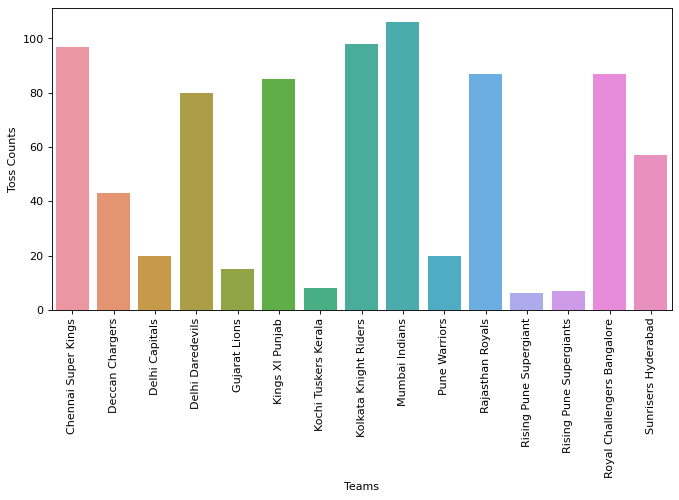

In [42]:
plt.figure(figsize=(10, 5), dpi=80)
plt.xticks(rotation = 90)
g = sns.barplot(x='toss_winner',y='id',data=toss_win_count)
plt.xlabel('Teams')
plt.ylabel('Toss Counts')
g

We can see from the bar-graph that, Mumbai Indians are in the top of winning most of the tosses, and also there are teams like CSK, KKR are almost same as MI , so we can say that they also have good toss win ratio

### Ipl winners (year - wise)

In [43]:
## Seperating month and date , from the column (date) in "match_df" data-frame and creating new columns for months and dates

def mths(x):
    return x.split('-')[1]

match_df['month'] = match_df['date'].apply(mths)

def dts(x):
    return x.split('-')[2]

match_df['only_date'] = match_df['date'].apply(dts)

In [44]:
match_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year,points,month,only_date
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,No,Asad Rauf,RE Koertzen,2008,2,04,18
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,No,MR Benson,SL Shastri,2008,2,04,19
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,No,Aleem Dar,GA Pratapkumar,2008,2,04,19
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,No,SJ Davis,DJ Harper,2008,2,04,20
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,No,BF Bowden,K Hariharan,2008,2,04,20


In [45]:
match_df['year'].unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020'], dtype=object)

In [46]:
match_df['month'] = match_df['month'].astype(int)
match_df['only_date'] = match_df['only_date'].astype(int)

df_2008 = match_df[match_df['year'] == '2008'].sort_values(['month','date'],ascending=False).iloc[0][['year','winner']].to_frame()
df_2009 = match_df[match_df['year'] == '2009'].sort_values(['month','date'],ascending=False).iloc[0][['year','winner']].to_frame()
df_2010 = match_df[match_df['year'] == '2010'].sort_values(['month','date'],ascending=False).iloc[0][['year','winner']].to_frame()
df_2011 = match_df[match_df['year'] == '2011'].sort_values(['month','date'],ascending=False).iloc[0][['year','winner']].to_frame()
df_2012 = match_df[match_df['year'] == '2012'].sort_values(['month','date'],ascending=False).iloc[0][['year','winner']].to_frame()
df_2013 = match_df[match_df['year'] == '2013'].sort_values(['month','date'],ascending=False).iloc[0][['year','winner']].to_frame()
df_2014 = match_df[match_df['year'] == '2014'].sort_values(['month','date'],ascending=False).iloc[0][['year','winner']].to_frame()
df_2015 = match_df[match_df['year'] == '2015'].sort_values(['month','date'],ascending=False).iloc[0][['year','winner']].to_frame()
df_2016 = match_df[match_df['year'] == '2016'].sort_values(['month','date'],ascending=False).iloc[0][['year','winner']].to_frame()
df_2017 = match_df[match_df['year'] == '2017'].sort_values(['month','date'],ascending=False).iloc[0][['year','winner']].to_frame()
df_2018 = match_df[match_df['year'] == '2018'].sort_values(['month','date'],ascending=False).iloc[0][['year','winner']].to_frame()
df_2019 = match_df[match_df['year'] == '2019'].sort_values(['month','date'],ascending=False).iloc[0][['year','winner']].to_frame()
df_2020 = match_df[match_df['year'] == '2020'].sort_values(['month','date'],ascending=False).iloc[0][['year','winner']].to_frame()

combining_data = pd.concat([df_2008,df_2009,df_2010,df_2011,df_2012,df_2013,df_2014,
                          df_2015,df_2016,df_2017,df_2018,df_2019,df_2020],axis = 1)
ipl_winners = combining_data.transpose()
ipl_winners = ipl_winners.reset_index(drop=True)
ipl_winners
# print(ipl_winners.to_string(index=False))

,year,winner
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


From the above table we can see the winners of ipl in the respective years, and we can also see MI has won it for most numbers of times and at second spot we have CSK with most title wins. i.e (3)

### Rain affecting game

In [47]:
rain_disturb_play = match_df.groupby(['method']).count().reset_index()['id']

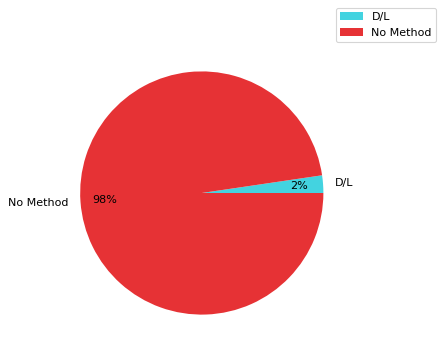

In [48]:
plt.figure(figsize=(10,10), dpi=80)
label = ['D/L','No Method']
color =['#43d3e0','#e63235']

method,txt,per = plt.pie(rain_disturb_play, labels=label, autopct='%1.0f%%',colors=color,pctdistance=0.8, labeldistance=1.1)
plt.legend(method,label, bbox_to_anchor=(0.6,0.9), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.5, right=0.6)

What is Duckworth-Lewis?

Duckworth-Lewis is based on the idea of compensating rain-affected teams for the loss of "run-scoring resources". The D/L method works on the basis that teams have two resources to make runs with: the number of overs to be bowled and the number of wickets in hand

We can clearly observe from the above pie-chart, there were only 2 percent of games that had to be decided using DuckWorth-Lewis method 

## Reading the new data (Ball-by-Ball Analysis)

In [49]:
complete_match_df = pd.read_csv(r'D:\ipl data set\IPL Ball-by-Ball 2008-2020.csv')

In [50]:
complete_match_df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [51]:
complete_match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [52]:
complete_match_df.isna().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [53]:
## Merging two different dataframe:

df2 = pd.merge(match_df,complete_match_df,how='inner',on='id') 

### Most sixes hit (year - wise) [New data set  used]

In [54]:
sixes = df2[df2['batsman_runs'] == 6]

In [55]:
sixes_year_wise = sixes.groupby(['year']).count().reset_index()

Text(0, 0.5, 'Nuumber Of Sixes')

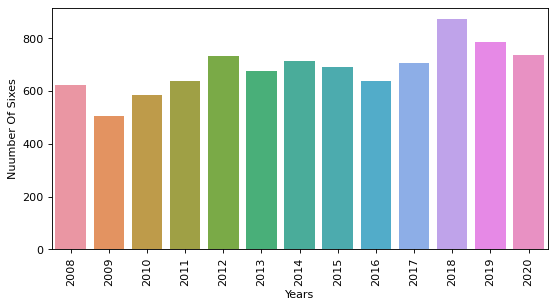

In [56]:
plt.figure(figsize=(8,4), dpi=80)
plt.xticks(rotation = 90)
mpl.rcParams.update(mpl.rcParamsDefault)
sns.barplot(x='year', y='id', data=sixes_year_wise)
plt.xlabel('Years')
plt.ylabel('Nuumber Of Sixes')

The above graph shows that the most sixes hit, combining all the teams was in the year 2018 and no doubt ipl 2018 was one of the most entertaining year for all the ipl fans as all the matches were very intresting to watch and was packed with full of action

### Main reason for dismissal of the batsmen 

In [57]:
df = complete_match_df.dropna(subset=['dismissal_kind'])

In [58]:
dismissal_type = df.groupby(['dismissal_kind']).count().reset_index()

Text(0, 0.5, 'Total Count')

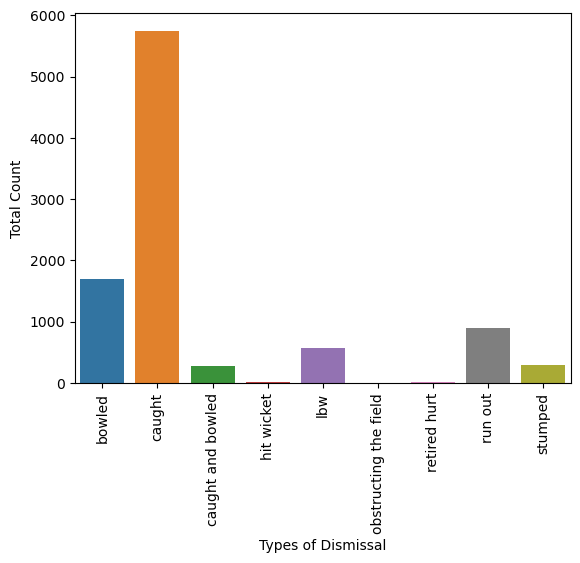

In [59]:
plt.xticks(rotation = 90)
sns.barplot(x=dismissal_type['dismissal_kind'],y=dismissal_type['id'])
plt.xlabel('Types of Dismissal')
plt.ylabel('Total Count')

The above bar-graph clearly shows that majority of the dismissals in ipl tournament is due to catch out and the second highest is bowled

### Bowler who dismissed a particular batmen for maximum number of times

In [60]:
## We can use the below code to know which bowler has dismissed a particular batsmen for maximum number of times

bowler = list(complete_match_df['bowler'].unique())

bowler_and_wickets = {new_list: 0 for new_list in bowler}

def dismissal_count(df2,batsmenname):
    if((df2['player_dismissed'] == batsmenname) and (df2['is_wicket'] == 1)):
        bowler_and_wickets['{b}'.format(b=df2['bowler'])] = bowler_and_wickets['{b}'.format(b=df2['bowler'])] + 1
        
df2.apply(dismissal_count, batsmenname='V Kohli',axis=1).head()   


data_items = bowler_and_wickets.items()
data_list = list(data_items)

df = pd.DataFrame(data_list,columns=['Bowler','Dismissal'])
dismissal_count = df.sort_values('Dismissal',ascending=False).head()

Text(0, 0.5, 'Dismissal Count')

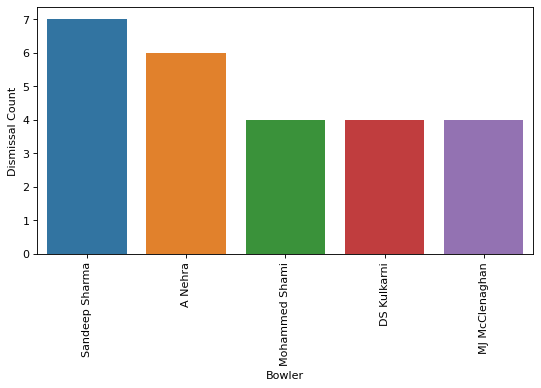

In [61]:
plt.figure(figsize=(8,4), dpi=80)
plt.xticks(rotation = 90)
sns.barplot(x='Bowler',y='Dismissal',data=dismissal_count.head())
plt.xlabel('Bowler')
plt.ylabel('Dismissal Count')

The above bar graph shows that V.Kholi is dismissed by Sandeep sharma for most number of times i.e (7), combinining all the ipl seasons. By this graph we can easily observe that V.Kholi needs to bat more cautiously against Sandeep Sharma and the bowling team can surely use Sandeep Sharma as one of the prominent bowler against V.Kholi

### Bowler with most number of wickets(year-wise)

In [62]:
is_wicket = df2[(df2['is_wicket'] == 1) & (df2['dismissal_kind'] != 'run out')]
most_wickets_year_wise = is_wicket.groupby(['year','bowler']).count().reset_index()

df_2008 = most_wickets_year_wise[most_wickets_year_wise['year'] == '2008'].sort_values('id',ascending=False).iloc[0][['bowler','id','year']].to_frame()
df_2009 = most_wickets_year_wise[most_wickets_year_wise['year'] == '2009'].sort_values('id',ascending=False).iloc[0][['bowler','id','year']].to_frame()
df_2010 = most_wickets_year_wise[most_wickets_year_wise['year'] == '2010'].sort_values('id',ascending=False).iloc[0][['bowler','id','year']].to_frame()
df_2011 = most_wickets_year_wise[most_wickets_year_wise['year'] == '2011'].sort_values('id',ascending=False).iloc[0][['bowler','id','year']].to_frame()
df_2012 = most_wickets_year_wise[most_wickets_year_wise['year'] == '2012'].sort_values('id',ascending=False).iloc[0][['bowler','id','year']].to_frame()
df_2013 = most_wickets_year_wise[most_wickets_year_wise['year'] == '2013'].sort_values('id',ascending=False).iloc[0][['bowler','id','year']].to_frame()
df_2014 = most_wickets_year_wise[most_wickets_year_wise['year'] == '2014'].sort_values('id',ascending=False).iloc[0][['bowler','id','year']].to_frame()
df_2015 = most_wickets_year_wise[most_wickets_year_wise['year'] == '2015'].sort_values('id',ascending=False).iloc[0][['bowler','id','year']].to_frame()
df_2016 = most_wickets_year_wise[most_wickets_year_wise['year'] == '2016'].sort_values('id',ascending=False).iloc[0][['bowler','id','year']].to_frame()
df_2017 = most_wickets_year_wise[most_wickets_year_wise['year'] == '2017'].sort_values('id',ascending=False).iloc[0][['bowler','id','year']].to_frame()
df_2018 = most_wickets_year_wise[most_wickets_year_wise['year'] == '2018'].sort_values('id',ascending=False).iloc[0][['bowler','id','year']].to_frame()
df_2019 = most_wickets_year_wise[most_wickets_year_wise['year'] == '2019'].sort_values('id',ascending=False).iloc[0][['bowler','id','year']].to_frame()
df_2020 = most_wickets_year_wise[most_wickets_year_wise['year'] == '2020'].sort_values('id',ascending=False).iloc[0][['bowler','id','year']].to_frame()

combining_data = pd.concat([df_2008,df_2009,df_2010,df_2011,df_2012,df_2013,df_2014,
                          df_2015,df_2016,df_2017,df_2018,df_2019,df_2020],axis = 1)
highest_wicket_takers = combining_data.transpose()
highest_wicket_takers = highest_wicket_takers.reset_index(drop=True)
highest_wicket_takers = highest_wicket_takers.rename(columns={'id':'wickets'})
highest_wicket_takers

,bowler,wickets,year
0,Sohail Tanvir,22,2008
1,RP Singh,23,2009
2,PP Ojha,21,2010
3,SL Malinga,28,2011
4,M Morkel,25,2012
5,DJ Bravo,32,2013
6,MM Sharma,23,2014
7,DJ Bravo,26,2015
8,B Kumar,23,2016
9,B Kumar,26,2017


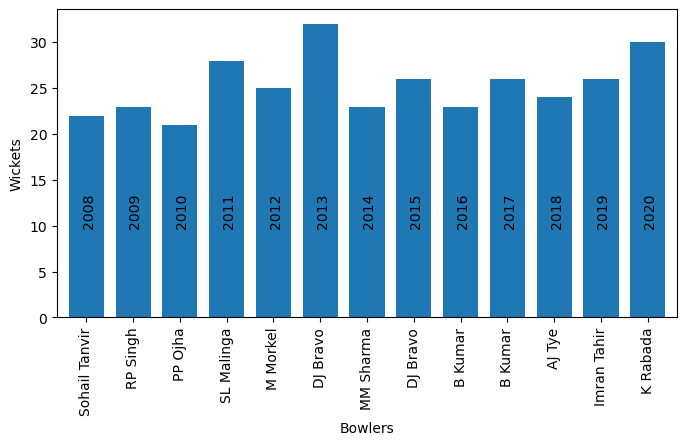

In [63]:
g=highest_wicket_takers.plot(kind='bar',x='bowler',width=0.75,figsize=(8,4),legend=False)
y=list(highest_wicket_takers['year'])
plt.xlabel('Bowlers')
plt.ylabel('Wickets')

count=-0.1

for index,value in enumerate(y):
    g.text(count,10,value,rotation=90)
    count+=1
    

### Which teams bowls the most extras year - wise

In [64]:
def extras_count(year):
    extras = df2[df2['extra_runs'] != 0]
    extras = extras[extras['year'] == '{y}'.format(y=year)]
    extras = extras.groupby(['bowling_team']).sum().reset_index()
    runs = list(extras['extra_runs'])
    plt.figure(figsize=(8,4), dpi=80)
    g = sns.barplot(x='bowling_team',y='extra_runs',data=extras)
    plt.xlabel('Teams')
    plt.ylabel('Extras Given')
    plt.xticks(rotation = 90)
    count = -0.1
    for index,value in enumerate(runs):
        g.text(count,40,value,rotation=90,fontweight='bold')
        count+=1

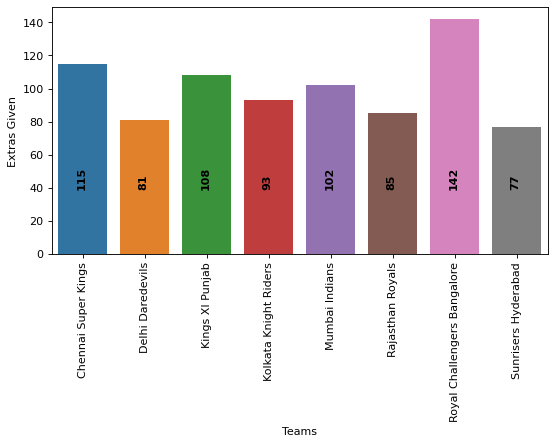

In [65]:
'''
We can pass any year between (2008 to 2020) as parameter in the function and get graph for teams with there 
"extra run" for that year
'''

extras_count('2018')

The above graph gives us a clear picture that in the year 2018, RCB(Royal Challengers Banglore) was the team who gave the most extras , i.e they gave a total extras of 142 runs throughout there entire matches

### Which type of extras has highest percentage 

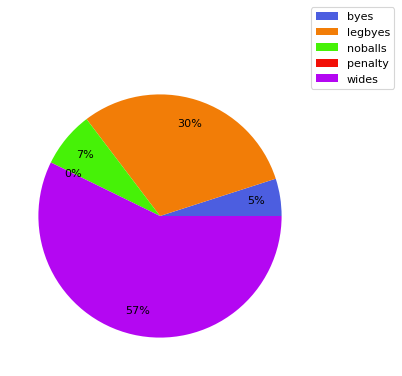

In [66]:
extras = complete_match_df.dropna(subset=['extras_type'])
extras = extras.groupby(['extras_type']).count().reset_index()

plt.figure(figsize=(10,10), dpi=80)
label = list(extras['extras_type'])
color = ['#4c5ee0','#f27d07','#46f207','#f20f07','#b407f2']

method,txt,per = plt.pie(extras['id'], autopct='%1.0f%%', colors=color, pctdistance=0.8, labeldistance=1.1)
plt.legend(method,label, bbox_to_anchor=(0.6,0.9), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.5, right=0.6)

Majority of the extra runs come through wides and legbyes, and in entire ipl season between 2008-2020 none of an extra run is come through a penalty, as it can be clearly observed from the pie chart

### Won the toss, choose to bat and won the match 

Here we are checking for, which team has highest winning ratio if they win the toss and decide to bat first

In [67]:
bat_first = match_df[match_df['toss_decision'] == 'bat']
bat_first = bat_first[bat_first['toss_winner'] == bat_first['winner']]

Text(0, 0.5, 'Bat First Win Match')

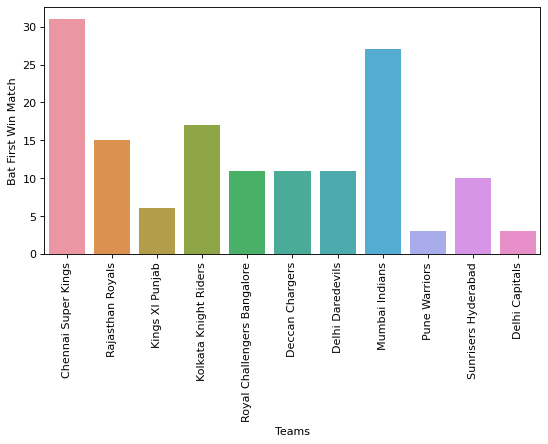

In [68]:
plt.figure(figsize=(8,4), dpi=80)
plt.xticks(rotation = 90)
sns.countplot(x='toss_winner',data=bat_first)
plt.xlabel('Teams')
plt.ylabel('Bat First Win Match')

We can see that CSK win most of the natch when they decide to bat first. We can also observe one more important thing that there should be total 15 teams but, the graph shows result for only 11 teams , so there is a possibility that there might be some error in our visualisation or may be the other 4 teams might have choose to bat and did not win the match , so we need to check for other 4 teams whether our assumption is right or wrong. 

In [69]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [70]:
ktk = match_df[(match_df['toss_winner'] == 'Kochi Tuskers Kerala') & (match_df['toss_decision'] == 'bat')]
ktk

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year,points,month,only_date
177,501200,Kochi,2011-04-09,AB de Villiers,Nehru Stadium,0,Kochi Tuskers Kerala,Royal Challengers Bangalore,Kochi Tuskers Kerala,bat,Royal Challengers Bangalore,wickets,6.0,N,No,HDPK Dharmasena,K Hariharan,2011,2,4,9
184,501207,Mumbai,2011-04-13,MD Mishra,Dr DY Patil Sports Academy,0,Pune Warriors,Kochi Tuskers Kerala,Kochi Tuskers Kerala,bat,Pune Warriors,wickets,4.0,N,No,S Asnani,PR Reiffel,2011,2,4,13
223,501247,Bangalore,2011-05-08,CH Gayle,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kochi Tuskers Kerala,Kochi Tuskers Kerala,bat,Royal Challengers Bangalore,wickets,9.0,N,No,Aleem Dar,SS Hazare,2011,2,5,8


In [71]:
rpss = match_df[(match_df['toss_winner'] == 'Rising Pune Supergiants') & (match_df['toss_decision'] == 'bat')]
rpss

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year,points,month,only_date
522,980911,Rajkot,2016-04-14,AJ Finch,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Rising Pune Supergiants,Rising Pune Supergiants,bat,Gujarat Lions,wickets,7.0,N,No,VA Kulkarni,CK Nandan,2016,2,4,14
526,980919,Chandigarh,2016-04-17,M Vohra,"Punjab Cricket Association IS Bindra Stadium, ...",0,Kings XI Punjab,Rising Pune Supergiants,Rising Pune Supergiants,bat,Kings XI Punjab,wickets,6.0,N,No,S Ravi,C Shamshuddin,2016,2,4,17
561,980989,Kolkata,2016-05-14,YK Pathan,Eden Gardens,0,Kolkata Knight Riders,Rising Pune Supergiants,Rising Pune Supergiants,bat,Kolkata Knight Riders,wickets,8.0,N,D/L,A Nand Kishore,BNJ Oxenford,2016,2,5,14


In [72]:
rps = match_df[(match_df['toss_winner'] == 'Rising Pune Supergiant') & (match_df['toss_decision'] == 'bat')]
rps

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year,points,month,only_date


In [73]:
gl = match_df[(match_df['toss_winner'] == 'Gujarat Lions') & (match_df['toss_decision'] == 'bat')]
gl

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year,points,month,only_date
610,1082625,Rajkot,2017-04-29,KH Pandya,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,Y,No,AK Chaudhary,CB Gaffaney,2017,1,4,29


We can see from above four tables, that our assumption was correct, the four teams which are not displayed on graphs have not won any match , when they won the toss and chose to bat

### Team who batted first and won match

Here we are checking for, which of the team has highest winning ratio if they bat first in a match 

In [74]:
batting_first = df2[df2['inning'] == 1]
batting_first = batting_first[batting_first['winner'] == batting_first['batting_team']]
batting_first = batting_first.groupby('date').last()
batting_first = batting_first.reset_index()

Text(0, 0.5, 'Bat First Win Match')

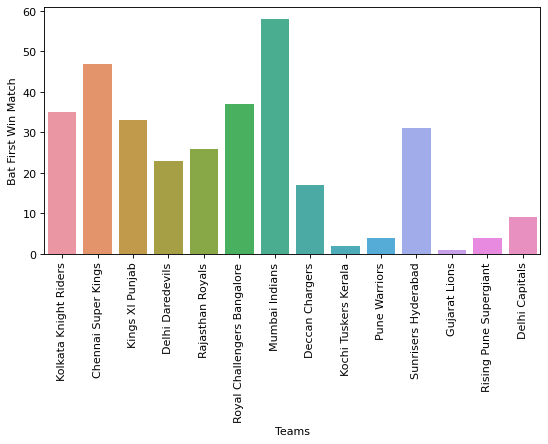

In [75]:
plt.figure(figsize=(8,4), dpi=80)
plt.xticks(rotation = 90)
sns.countplot(x='batting_team',data=batting_first)
plt.xlabel('Teams')
plt.ylabel('Bat First Win Match')

The above graph tells us that no matter a team wins or losses a toss, but if they bat first MI(Mumbai Indian) is the team who wins there most matches

### Highest run in an over year wise distribution

In [197]:
highest_run = df2.groupby(['year','month','only_date','inning','over','batsman',
                           'bowler','bowling_team','batting_team'])['batsman_runs'].sum().reset_index()
idx = highest_run.groupby(['year'])['batsman_runs'].transform(max) == highest_run['batsman_runs']
highest_run = highest_run[idx]
highest_run.drop(['month','only_date','inning','over'],axis=1,inplace=True)
highest_run.rename(columns={'year':'Year','batsman':'Batsman','bowler':'Bowler','bowling_team':'Bowling Team',
                            'batting_team':'Batting Team','batsman_runs':'Runs'},inplace=True)

In [199]:
highest_run.reset_index(drop=True)

,Year,Batsman,Bowler,Bowling Team,Batting Team,Runs
0,2008,V Sehwag,A Symonds,Deccan Chargers,Delhi Daredevils,30
1,2009,MS Dhoni,VRV Singh,Kings XI Punjab,Chennai Super Kings,24
2,2009,TM Dilshan,Shoaib Ahmed,Deccan Chargers,Delhi Daredevils,24
3,2010,RV Uthappa,S Sreesanth,Kings XI Punjab,Royal Challengers Bangalore,25
4,2011,CH Gayle,P Parameswaran,Kochi Tuskers Kerala,Royal Challengers Bangalore,36
5,2012,CH Gayle,R Sharma,Pune Warriors,Royal Challengers Bangalore,30
6,2013,CH Gayle,MR Marsh,Pune Warriors,Royal Challengers Bangalore,28
7,2013,CH Gayle,AJ Finch,Pune Warriors,Royal Challengers Bangalore,28
8,2014,SK Raina,P Awana,Kings XI Punjab,Chennai Super Kings,32
9,2015,CH Gayle,B Kumar,Sunrisers Hyderabad,Royal Challengers Bangalore,24
